In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

In [3]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


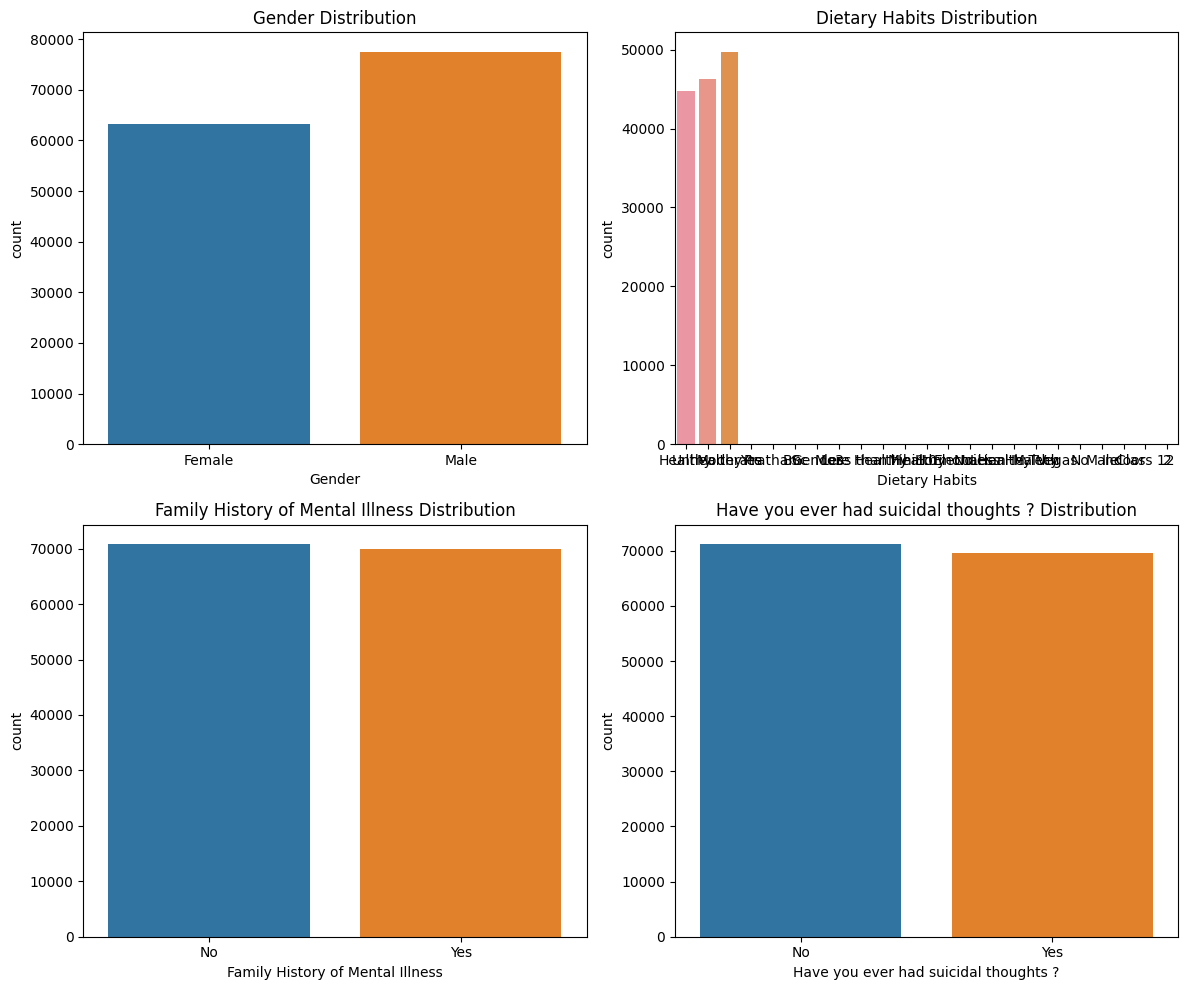

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot and the tick labels
categorical_columns = ['Gender', 'Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
custom_tick_labels = {
    'Gender': ['Male', 'Female'],
    'Dietary Habits': ['Unhealthy', 'Moderate', 'Healthy'],
    'Family History of Mental Illness': ['No', 'Yes'],
    'Have you ever had suicidal thoughts ?': ['No', 'Yes']
}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the columns and corresponding axes
for i, column in enumerate(categorical_columns):
    sns.countplot(data=train, x=column, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
      # Set custom tick labels

# Adjust layout
plt.tight_layout()
plt.show()

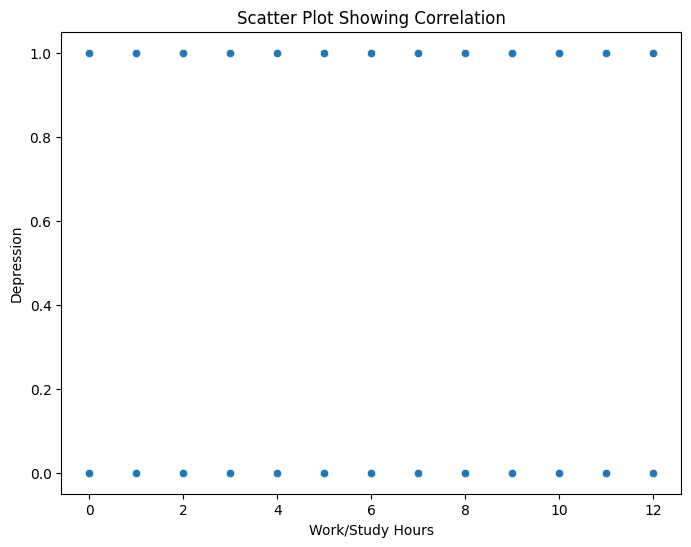

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work/Study Hours', y='Depression', data=train)
plt.title("Scatter Plot Showing Correlation")
plt.xlabel("Work/Study Hours")
plt.ylabel("Depression")
plt.show()

In [7]:
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [8]:
final=pd.concat([train,test],axis=0)
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             173238 non-null  object 
 7   Academic Pressure                      46664 non-null   float64
 8   Work Pressure                          187804 non-null  float64
 9   CGPA                                   46664 non-null   float64
 10  Study Satisfaction                     46664 non-null   float6

In [9]:
final["Age"]=final["Age"].astype(int)

In [10]:
final.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [11]:
final["Gender"]=final["Gender"].map({"Female":1,"Male":0})
final

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,1,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,0,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,0,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,0,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,1,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,NaN
93796,234496,Shlok,0,29,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,NaN
93797,234497,Rishi,0,24,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,NaN
93798,234498,Eshita,1,23,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,NaN


In [12]:
final.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,1,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,0,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,0,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,0,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,1,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [13]:
final.drop(columns=["Name","City"],axis=1,inplace=True)

In [14]:
final.tail()

,id,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
93795,234495,1,49,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,NaN
93796,234496,0,29,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,NaN
93797,234497,0,24,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,NaN
93798,234498,1,23,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,NaN
93799,234499,1,43,Working Professional,Educational Consultant,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,B.Ed,No,11.0,2.0,No,NaN


In [15]:
WPS=pd.get_dummies(final["Working Professional or Student"]).astype(int)

In [16]:
final.head()


,id,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,0,26,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,0,33,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,0,22,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,1,30,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [17]:
WPS.head()

,Student,Working Professional
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [18]:
final.isnull().sum()

id                                            0
Gender                                        0
Age                                           0
Working Professional or Student               0
Profession                                61262
Academic Pressure                        187836
Work Pressure                             46696
CGPA                                     187836
Study Satisfaction                       187836
Job Satisfaction                          46684
Sleep Duration                                0
Dietary Habits                                9
Degree                                        4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                93800
dtype: int64

In [19]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Working Professional or Student        234500 non-null  object 
 4   Profession                             173238 non-null  object 
 5   Academic Pressure                      46664 non-null   float64
 6   Work Pressure                          187804 non-null  float64
 7   CGPA                                   46664 non-null   float64
 8   Study Satisfaction                     46664 non-null   float64
 9   Job Satisfaction                       187816 non-null  float64
 10  Sleep Duration                         234500 non-null  object

In [20]:
final.drop(columns=["Study Satisfaction","Academic Pressure","CGPA"],axis=1,inplace=True)

In [21]:
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [22]:
final.isnull().sum()

id                                           0
Gender                                       0
Age                                          0
Working Professional or Student              0
Profession                               61262
Work Pressure                            46696
Job Satisfaction                         46684
Sleep Duration                               0
Dietary Habits                               9
Degree                                       4
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                               93800
dtype: int64

In [23]:
final.isna().sum()

id                                           0
Gender                                       0
Age                                          0
Working Professional or Student              0
Profession                               61262
Work Pressure                            46696
Job Satisfaction                         46684
Sleep Duration                               0
Dietary Habits                               9
Degree                                       4
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                               93800
dtype: int64

In [24]:
final["Profession"].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

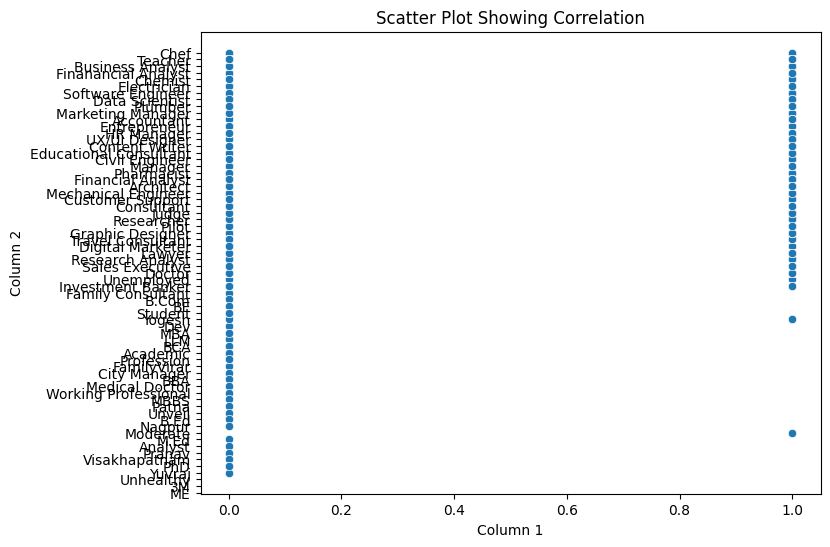

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Depression', y='Profession', data=final)
plt.title("Scatter Plot Showing Correlation")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()


In [27]:
fi=pd.get_dummies(final["Have you ever had suicidal thoughts ?"],prefix='Suicidal thought').astype(int)
fi.head()

,Suicidal thought_No,Suicidal thought_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
mode_value = final['Financial Stress'].mode()[0]  # Get the first mode value

# Replace NaN with mode
final['Financial Stress'].fillna(mode_value, inplace=True)
final["Financial Stress"].astype(int)

/tmp/ipykernel_30/2606624417.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['Financial Stress'].fillna(mode_value, inplace=True)


0        2
1        3
2        1
3        1
4        4
        ..
93795    2
93796    3
93797    1
93798    5
93799    2
Name: Financial Stress, Length: 234500, dtype: int64

In [29]:
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [30]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Working Professional or Student        234500 non-null  object 
 4   Profession                             173238 non-null  object 
 5   Work Pressure                          187804 non-null  float64
 6   Job Satisfaction                       187816 non-null  float64
 7   Sleep Duration                         234500 non-null  object 
 8   Dietary Habits                         234491 non-null  object 
 9   Degree                                 234496 non-null  object 
 10  Have you ever had suicidal thoughts ?  234500 non-null  object

In [31]:
final.isna().sum()

id                                           0
Gender                                       0
Age                                          0
Working Professional or Student              0
Profession                               61262
Work Pressure                            46696
Job Satisfaction                         46684
Sleep Duration                               0
Dietary Habits                               9
Degree                                       4
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                               93800
dtype: int64

In [32]:
final["Financial Stress"]=final["Financial Stress"].astype(int)

In [33]:
final

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2,No,0.0
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3,No,1.0
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1,No,1.0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1,Yes,1.0
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49,Working Professional,Pilot,3.0,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2,Yes,NaN
93796,234496,0,29,Working Professional,Pilot,5.0,1.0,7-8 hours,Moderate,BE,Yes,11.0,3,Yes,NaN
93797,234497,0,24,Student,NaN,NaN,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1,No,NaN
93798,234498,1,23,Working Professional,Marketing Manager,4.0,2.0,5-6 hours,Healthy,BA,Yes,7.0,5,Yes,NaN


In [34]:
final["Work/Study Hours"]=final["Work/Study Hours"].astype(int)

In [35]:
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1,2,No,0.0
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1.0
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1.0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1.0
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0.0


In [36]:
final["Family History of Mental Illness"]=final["Family History of Mental Illness"].map({"No":0,"Yes":1})
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1,2,0,0.0
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3,0,1.0
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1,0,1.0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1,1,1.0
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4,1,0.0


In [37]:
final["Have you ever had suicidal thoughts ?"] = final["Have you ever had suicidal thoughts ?"].map({"Yes":1,"No":0})

In [38]:
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1,2,0,0.0
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7,3,0,1.0
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3,1,0,1.0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10,1,1,1.0
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9,4,1,0.0


In [39]:
final["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2',
       'Prachi', 'Mealy', 'Resistant', 'MCA', '5 Healthy', 'Academic',
       'Educational', 'Soham', '5 Unhealthy', 'Vivaan', 'Raghav', 'Naina',
       'Kolkata'], dtype=object)

In [40]:
final=pd.concat([final,WPS],axis=1)

In [41]:
final

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional
0,0,1,49,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1,2,0,0.0,0,1
1,1,0,26,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7,3,0,1.0,0,1
2,2,0,33,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3,1,0,1.0,1,0
3,3,0,22,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10,1,1,1.0,0,1
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9,4,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49,Working Professional,Pilot,3.0,5.0,Less than 5 hours,Moderate,BSc,1,2,2,1,NaN,0,1
93796,234496,0,29,Working Professional,Pilot,5.0,1.0,7-8 hours,Moderate,BE,1,11,3,1,NaN,0,1
93797,234497,0,24,Student,NaN,NaN,NaN,7-8 hours,Moderate,B.Tech,0,7,1,0,NaN,1,0
93798,234498,1,23,Working Professional,Marketing Manager,4.0,2.0,5-6 hours,Healthy,BA,1,7,5,1,NaN,0,1


In [42]:
final=pd.concat([final,fi],axis=1)

In [43]:
final.tail(80)

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
93720,234420,1,28,Student,NaN,NaN,NaN,7-8 hours,Unhealthy,BA,1,12,2,1,NaN,1,0,0,1
93721,234421,1,46,Working Professional,Researcher,3.0,5.0,5-6 hours,Healthy,MSc,1,7,4,1,NaN,0,1,0,1
93722,234422,1,36,Working Professional,Chemist,3.0,2.0,More than 8 hours,Moderate,B.Pharm,1,3,5,1,NaN,0,1,0,1
93723,234423,1,49,Working Professional,Financial Analyst,2.0,5.0,Less than 5 hours,Healthy,MBA,0,1,1,0,NaN,0,1,1,0
93724,234424,0,35,Working Professional,Plumber,3.0,4.0,More than 8 hours,Healthy,MCA,1,12,1,0,NaN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49,Working Professional,Pilot,3.0,5.0,Less than 5 hours,Moderate,BSc,1,2,2,1,NaN,0,1,0,1
93796,234496,0,29,Working Professional,Pilot,5.0,1.0,7-8 hours,Moderate,BE,1,11,3,1,NaN,0,1,0,1
93797,234497,0,24,Student,NaN,NaN,NaN,7-8 hours,Moderate,B.Tech,0,7,1,0,NaN,1,0,1,0
93798,234498,1,23,Working Professional,Marketing Manager,4.0,2.0,5-6 hours,Healthy,BA,1,7,5,1,NaN,0,1,0,1


In [44]:
final.drop(columns=["Working Professional or Student"],axis=1)

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49,Pilot,3.0,5.0,Less than 5 hours,Moderate,BSc,1,2,2,1,NaN,0,1,0,1
93796,234496,0,29,Pilot,5.0,1.0,7-8 hours,Moderate,BE,1,11,3,1,NaN,0,1,0,1
93797,234497,0,24,NaN,NaN,NaN,7-8 hours,Moderate,B.Tech,0,7,1,0,NaN,1,0,1,0
93798,234498,1,23,Marketing Manager,4.0,2.0,5-6 hours,Healthy,BA,1,7,5,1,NaN,0,1,0,1


In [45]:
final["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours', '0', 'Meerut',
       '60-65 hours', 'Vivan', '8-89 hours',
       'Have_you_ever_had_suicidal_thoughts', '20-21 hours', '6 hours',
       '50-75 hours', '9-10 hours'], dtype=object)

In [46]:
sleep_duration_mapping = {
    'More than 8 hours': 9,
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    '1-2 hours': 1.5,
    '6-8 hours': 7,
    '4-6 hours': 5,
    '6-7 hours': 6.5,
    '10-11 hours': 10.5,
    '8-9 hours': 8.5,
    '40-45 hours': 42.5,
    '9-11 hours': 10,
    '2-3 hours': 2.5,
    '3-4 hours': 3.5,
    'Moderate': 7,  # Assuming moderate sleep is around 7 hours
    '55-66 hours': 60.5,
    '4-5 hours': 4.5,
    '9-6 hours': 7.5,  # Assuming a typo, correcting to mean value
    '1-3 hours': 2,
    '1-6 hours': 3.5,
    '35-36 hours': 35.5,
    '8 hours': 8,
    '10-6 hours': 8,  # Assuming typo, correcting to mean value
    'than 5 hours': 5,
    '49 hours': 49,
    'Unhealthy': 3,  # Assuming unhealthy sleep is low (3 hours)
    '3-6 hours': 4.5,
    '45-48 hours': 46.5,
    '9-5': 7,  # Assuming standard 9-5 schedule implies healthy sleep
    '9-5 hours': 7,
    '60-65 hours': 62.5,
    '8-89 hours': 8,  # Likely a typo, corrected to 8
    '20-21 hours': 20.5,
    '6 hours': 6,
    '50-75 hours': 62.5,
    '9-10 hours': 9.5
}

# Step 2: Map the Values to Numerical Data
final['Sleep Duration'] = final['Sleep Duration'].map(sleep_duration_mapping)

# Step 3: Handle Missing or Invalid Values
# Replace NaN with a default value (e.g., mean, median, or drop the rows)
final['Sleep Duration'].fillna(value=np.nan, inplace=True)

# Display the Resulting DataFrame
print(final)

           id  Gender  Age Working Professional or Student  \
0           0       1   49            Working Professional   
1           1       0   26            Working Professional   
2           2       0   33                         Student   
3           3       0   22            Working Professional   
4           4       1   30            Working Professional   
...       ...     ...  ...                             ...   
93795  234495       1   49            Working Professional   
93796  234496       0   29            Working Professional   
93797  234497       0   24                         Student   
93798  234498       1   23            Working Professional   
93799  234499       1   43            Working Professional   

                   Profession  Work Pressure  Job Satisfaction  \
0                        Chef            5.0               2.0   
1                     Teacher            4.0               3.0   
2                         NaN            NaN             

/tmp/ipykernel_30/1754415298.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['Sleep Duration'].fillna(value=np.nan, inplace=True)


In [47]:
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Working Professional,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Working Professional,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,Student,NaN,NaN,NaN,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Working Professional,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1


In [48]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Working Professional or Student        234500 non-null  object 
 4   Profession                             173238 non-null  object 
 5   Work Pressure                          187804 non-null  float64
 6   Job Satisfaction                       187816 non-null  float64
 7   Sleep Duration                         234484 non-null  float64
 8   Dietary Habits                         234491 non-null  object 
 9   Degree                                 234496 non-null  object 
 10  Have you ever had suicidal thoughts ?  234500 non-null  int64 

In [49]:
final["Sleep Duration"].unique()

array([ 9. ,  4. ,  5.5,  7.5,  nan,  1.5,  7. ,  5. ,  6.5, 10.5,  8.5,
       42.5, 10. ,  2.5,  3.5, 60.5,  4.5,  2. , 35.5,  8. , 49. ,  3. ,
       46.5, 62.5, 20.5,  6. ,  9.5])

In [50]:
mode_value = final['Sleep Duration'].mode()[0]  # Get the first mode value

# Replace NaN with mode
final['Sleep Duration'].fillna(mode_value, inplace=True)
# final["Sleep Duration"].astype(int)

/tmp/ipykernel_30/690281077.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['Sleep Duration'].fillna(mode_value, inplace=True)


In [51]:
mode_value =final["Job Satisfaction"].median()
final["Job Satisfaction"].fillna(mode_value, inplace=True)
final["Job Satisfaction"].astype(int)

/tmp/ipykernel_30/451730991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final["Job Satisfaction"].fillna(mode_value, inplace=True)


0        2
1        3
2        3
3        1
4        1
        ..
93795    5
93796    1
93797    3
93798    2
93799    2
Name: Job Satisfaction, Length: 234500, dtype: int64

In [52]:
final.head()

,id,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Working Professional,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Working Professional,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,Student,NaN,NaN,3.0,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Working Professional,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Working Professional,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1


In [53]:
final["Sleep Duration"].info()

<class 'pandas.core.series.Series'>
Index: 234500 entries, 0 to 93799
Series name: Sleep Duration
Non-Null Count   Dtype  
--------------   -----  
234500 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


In [54]:
final.drop(columns=["Working Professional or Student"],axis=1,inplace=True)

In [55]:
final.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,NaN,NaN,3.0,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1


In [56]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Profession                             173238 non-null  object 
 4   Work Pressure                          187804 non-null  float64
 5   Job Satisfaction                       234500 non-null  float64
 6   Sleep Duration                         234500 non-null  float64
 7   Dietary Habits                         234491 non-null  object 
 8   Degree                                 234496 non-null  object 
 9   Have you ever had suicidal thoughts ?  234500 non-null  int64  
 10  Work/Study Hours                       234500 non-null  int64 

In [57]:
final["Job Satisfaction"].unique()

array([2., 3., 1., 5., 4.])

In [58]:
final.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,NaN,NaN,3.0,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1


In [59]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Profession                             173238 non-null  object 
 4   Work Pressure                          187804 non-null  float64
 5   Job Satisfaction                       234500 non-null  float64
 6   Sleep Duration                         234500 non-null  float64
 7   Dietary Habits                         234491 non-null  object 
 8   Degree                                 234496 non-null  object 
 9   Have you ever had suicidal thoughts ?  234500 non-null  int64  
 10  Work/Study Hours                       234500 non-null  int64 

In [60]:
mode_value =final["Work Pressure"].median()
final["Work Pressure"].fillna(mode_value, inplace=True)
final["Work Pressure"].astype(int)

/tmp/ipykernel_30/1634095819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final["Work Pressure"].fillna(mode_value, inplace=True)


0        5
1        4
2        3
3        5
4        1
        ..
93795    3
93796    5
93797    3
93798    4
93799    5
Name: Work Pressure, Length: 234500, dtype: int64

In [61]:
final.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,NaN,3.0,3.0,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1


In [62]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Profession                             173238 non-null  object 
 4   Work Pressure                          234500 non-null  float64
 5   Job Satisfaction                       234500 non-null  float64
 6   Sleep Duration                         234500 non-null  float64
 7   Dietary Habits                         234491 non-null  object 
 8   Degree                                 234496 non-null  object 
 9   Have you ever had suicidal thoughts ?  234500 non-null  int64  
 10  Work/Study Hours                       234500 non-null  int64 

In [63]:
final["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

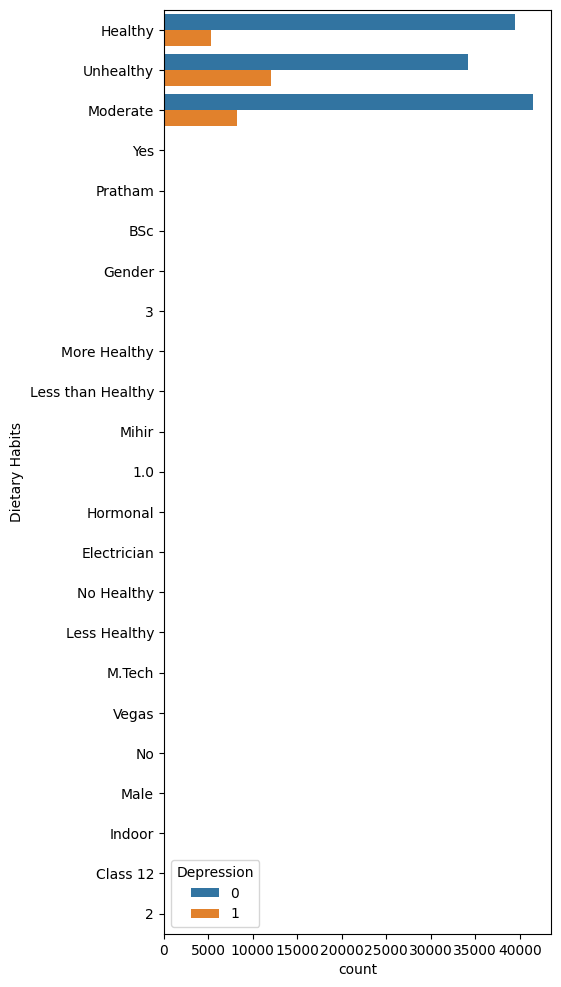

In [64]:
plt.figure(figsize=(5, 12))
sns.countplot(data=train, y='Dietary Habits', hue='Depression');

In [65]:
final["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2',
       'Prachi', 'Mealy', 'Resistant', 'MCA', '5 Healthy', 'Academic',
       'Educational', 'Soham', '5 Unhealthy', 'Vivaan', 'Raghav', 'Naina',
       'Kolkata'], dtype=object)

In [66]:
valid_values = ['Healthy', 'Unhealthy', 'Moderate']

# Replace all other values with "Moderate"
final['Dietary Habits'] = final['Dietary Habits'].apply(lambda x: x if x in valid_values else 'Moderate')

# Display the cleaned DataFrame
final.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes
0,0,1,49,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0
1,1,0,26,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1
2,2,0,33,NaN,3.0,3.0,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1
3,3,0,22,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1
4,4,1,30,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1


In [67]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Profession                             173238 non-null  object 
 4   Work Pressure                          234500 non-null  float64
 5   Job Satisfaction                       234500 non-null  float64
 6   Sleep Duration                         234500 non-null  float64
 7   Dietary Habits                         234500 non-null  object 
 8   Degree                                 234496 non-null  object 
 9   Have you ever had suicidal thoughts ?  234500 non-null  int64  
 10  Work/Study Hours                       234500 non-null  int64 

In [68]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [69]:
categorical_cols = ["Profession", "Degree"]


In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to Degree and Profession
final['Degree_Label'] = label_encoder.fit_transform(final['Degree'])
final['Profession_Label'] = label_encoder.fit_transform(final['Profession'])
final

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes,Degree_Label,Profession_Label
0,0,1,49,Chef,5.0,2.0,9.0,Healthy,BHM,0,1,2,0,0.0,0,1,1,0,50,13
1,1,0,26,Teacher,4.0,3.0,4.0,Unhealthy,LLB,1,7,3,0,1.0,0,1,0,1,92,71
2,2,0,33,NaN,3.0,3.0,5.5,Healthy,B.Pharm,1,3,1,0,1.0,1,0,0,1,34,81
3,3,0,22,Teacher,5.0,1.0,4.0,Moderate,BBA,1,10,1,1,1.0,0,1,0,1,44,71
4,4,1,30,Business Analyst,1.0,1.0,5.5,Unhealthy,BBA,1,9,4,1,0.0,0,1,0,1,44,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49,Pilot,3.0,5.0,4.0,Moderate,BSc,1,2,2,1,NaN,0,1,0,1,53,58
93796,234496,0,29,Pilot,5.0,1.0,7.5,Moderate,BE,1,11,3,1,NaN,0,1,0,1,46,58
93797,234497,0,24,NaN,3.0,3.0,7.5,Moderate,B.Tech,0,7,1,0,NaN,1,0,1,0,39,81
93798,234498,1,23,Marketing Manager,4.0,2.0,5.5,Healthy,BA,1,7,5,1,NaN,0,1,0,1,41,48


In [71]:
final["Dietary Habits"] = final["Dietary Habits"].map({"Healthy":1,"Moderate":2,"Unhealthy":0})

In [72]:
final.head()

,id,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Suicidal thought_No,Suicidal thought_Yes,Degree_Label,Profession_Label
0,0,1,49,Chef,5.0,2.0,9.0,1,BHM,0,1,2,0,0.0,0,1,1,0,50,13
1,1,0,26,Teacher,4.0,3.0,4.0,0,LLB,1,7,3,0,1.0,0,1,0,1,92,71
2,2,0,33,NaN,3.0,3.0,5.5,1,B.Pharm,1,3,1,0,1.0,1,0,0,1,34,81
3,3,0,22,Teacher,5.0,1.0,4.0,2,BBA,1,10,1,1,1.0,0,1,0,1,44,71
4,4,1,30,Business Analyst,1.0,1.0,5.5,0,BBA,1,9,4,1,0.0,0,1,0,1,44,12


In [73]:
final.drop(columns=["Profession","Degree","Suicidal thought_No","Suicidal thought_Yes"],inplace=True)

In [74]:
final.head()

,id,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student,Working Professional,Degree_Label,Profession_Label
0,0,1,49,5.0,2.0,9.0,1,0,1,2,0,0.0,0,1,50,13
1,1,0,26,4.0,3.0,4.0,0,1,7,3,0,1.0,0,1,92,71
2,2,0,33,3.0,3.0,5.5,1,1,3,1,0,1.0,1,0,34,81
3,3,0,22,5.0,1.0,4.0,2,1,10,1,1,1.0,0,1,44,71
4,4,1,30,1.0,1.0,5.5,0,1,9,4,1,0.0,0,1,44,12


In [75]:
final.rename(columns={"Family History of Mental Illness":"Family_Illness"},inplace=True)

In [76]:
final.head()

,id,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family_Illness,Depression,Student,Working Professional,Degree_Label,Profession_Label
0,0,1,49,5.0,2.0,9.0,1,0,1,2,0,0.0,0,1,50,13
1,1,0,26,4.0,3.0,4.0,0,1,7,3,0,1.0,0,1,92,71
2,2,0,33,3.0,3.0,5.5,1,1,3,1,0,1.0,1,0,34,81
3,3,0,22,5.0,1.0,4.0,2,1,10,1,1,1.0,0,1,44,71
4,4,1,30,1.0,1.0,5.5,0,1,9,4,1,0.0,0,1,44,12


In [77]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Gender                                 234500 non-null  int64  
 2   Age                                    234500 non-null  int64  
 3   Work Pressure                          234500 non-null  float64
 4   Job Satisfaction                       234500 non-null  float64
 5   Sleep Duration                         234500 non-null  float64
 6   Dietary Habits                         234500 non-null  int64  
 7   Have you ever had suicidal thoughts ?  234500 non-null  int64  
 8   Work/Study Hours                       234500 non-null  int64  
 9   Financial Stress                       234500 non-null  int64  
 10  Family_Illness                         234500 non-null  int64 

In [78]:
final.rename(columns={"Have you ever had suicidal thoughts ?":"suicidal_thought"},inplace=True)

In [79]:
final.head()

,id,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,suicidal_thought,Work/Study Hours,Financial Stress,Family_Illness,Depression,Student,Working Professional,Degree_Label,Profession_Label
0,0,1,49,5.0,2.0,9.0,1,0,1,2,0,0.0,0,1,50,13
1,1,0,26,4.0,3.0,4.0,0,1,7,3,0,1.0,0,1,92,71
2,2,0,33,3.0,3.0,5.5,1,1,3,1,0,1.0,1,0,34,81
3,3,0,22,5.0,1.0,4.0,2,1,10,1,1,1.0,0,1,44,71
4,4,1,30,1.0,1.0,5.5,0,1,9,4,1,0.0,0,1,44,12


**Train_Test_Split> **

**Train_Test_Split**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Define Features (X) and Target (y)
X = final.drop(columns=['Depression', 'id'])  # Features (exclude 'id' and 'Depression')
y = final['Depression']                      # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)


Training Features (X_train): (187600, 14)
Testing Features (X_test): (46900, 14)
Training Target (y_train): (187600,)
Testing Target (y_test): (46900,)


In [82]:
final = final.dropna(subset=['Depression'])

# Proceed with train-test split
X = final.drop(columns=['id', 'Depression'])
y = final['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression # 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [87]:
log_reg= LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Gradient Decent

In [88]:

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9302771855010661


In [89]:


# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     22986
         1.0       0.81      0.78      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.87      0.88     28140
weighted avg       0.93      0.93      0.93     28140


Confusion Matrix:
[[22061   925]
 [ 1139  4015]]


In [90]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.93
Testing Accuracy: 0.93


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Hyperparameter TUNNING# 

In [93]:

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     22986
         1.0       0.81      0.78      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.87      0.88     28140
weighted avg       0.93      0.93      0.93     28140

ROC-AUC Score: 0.97

Confusion Matrix:
[[22061   925]
 [ 1139  4015]]


In [94]:
y_pred = log_reg.predict(X_test)

# Create Submission DataFrame
submission = pd.DataFrame({
    'id': X_test.index,      # Ensure 'id' column matches the test set index or IDs
    'Depression': y_pred     # Predicted values for the target variable
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [95]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28140 non-null  int64  
 1   Depression  28140 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 439.8 KB
